# SMDM PROJECT

1.WHOLESALE CUSTOMER DATA
2.UNIVERSITY SURVEY DATA
3.MANUFACTURING SHINGLES DATA

# 1.WHOLESALE CUSTOMER DATA

1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
df=pd.read_csv("Wholesale+Customers+Data.csv")

In [59]:
#CHECKING THE FIRST 5 ROWS OF THE DATASET

df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
#CHECKING THE INFORMATION OF THE DATASET

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [5]:
#CHECKING THE DATATYPES OF THE VARIABLES IN THE DATASET

df.dtypes

Buyer/Spender        int64
Channel             object
Region              object
Fresh                int64
Milk                 int64
Grocery              int64
Frozen               int64
Detergents_Paper     int64
Delicatessen         int64
dtype: object

In [6]:
#CHECKING FOR THE NULL VALUES IN THE DATASET

df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [7]:
#CHECKING THE DESCRIPTION OF THE DATASET

df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


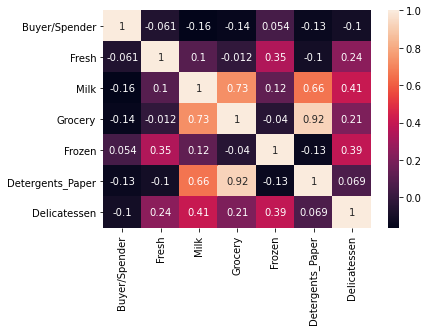

In [8]:
#CORREALTION PLOT

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

<Figure size 1944x2304 with 0 Axes>

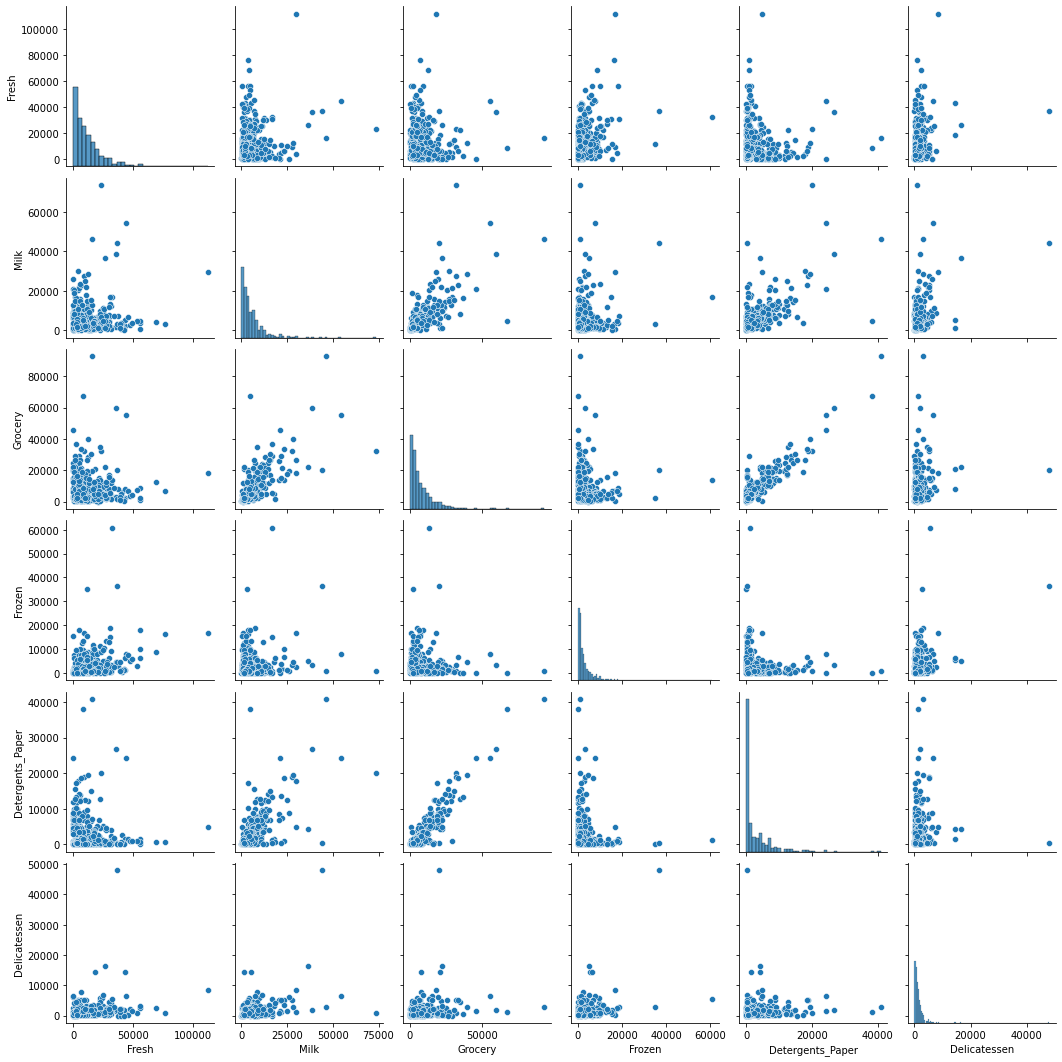

In [20]:
#PAIR PLOT

products = df[df.columns[+2:df.columns.size]]
plt.figure(figsize = (27,32))
sns.pairplot(products)
plt.show()

1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [11]:
df_spending=df.copy()
df_spending['Spending']=df['Fresh']+df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicatessen']
df_spending

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Spending
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [12]:
region=df_spending.groupby('Region')['Spending'].sum()
print (region)

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Spending, dtype: int64


In [13]:
channel=df_spending.groupby('Channel')['Spending'].sum()
print (channel)

Channel
Hotel     7999569
Retail    6619931
Name: Spending, dtype: int64


Highest spend region is others and least spend region is Oporto Highest spend channel is from Retail and the lowest spend channel is from Hotel

1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot showing annual spending on item-Fresh over different region and channel')

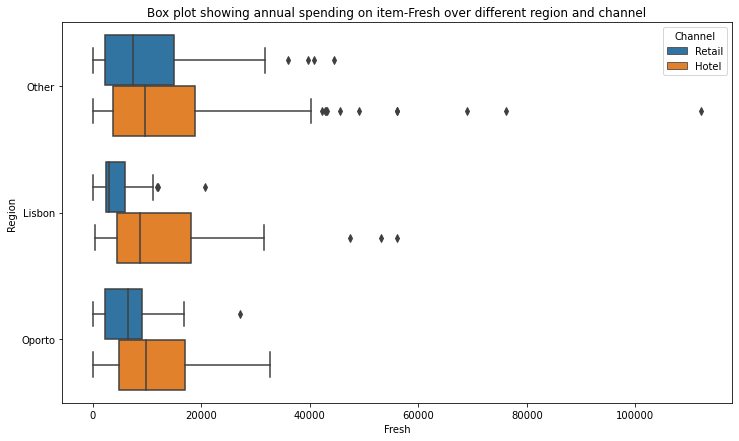

In [60]:
plt.figure(figsize=(12,7))
sns.boxplot(df['Fresh'],df['Region'],hue=df['Channel'])
plt.title("Box plot showing annual spending on item-Fresh over different region and channel")

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot showing annual spending on item-Milk over different region and channel')

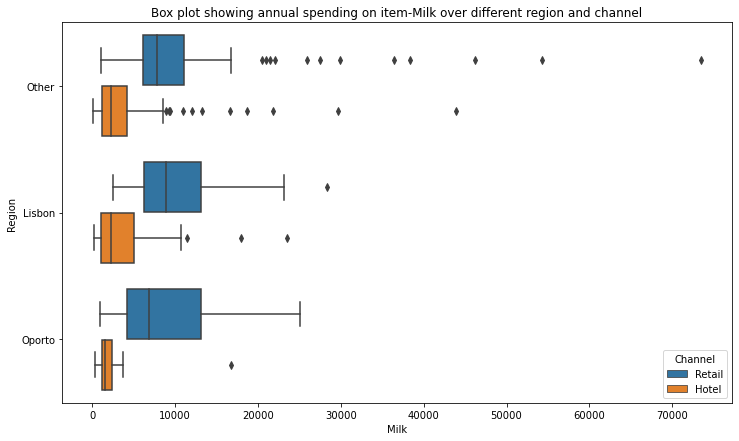

In [13]:
plt.figure(figsize=(12,7))
sns.boxplot(df['Milk'],df['Region'],hue=df['Channel'])
plt.title("Box plot showing annual spending on item-Milk over different region and channel")

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot showing the annual spending on item-Grocery over different region and channel')

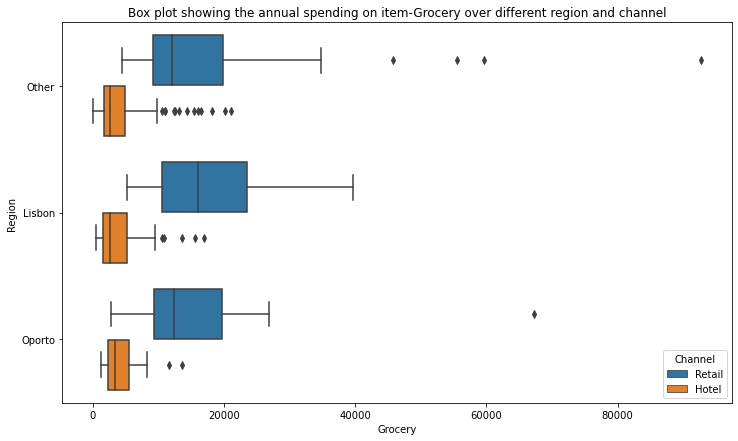

In [14]:
plt.figure(figsize=(12,7))
sns.boxplot(df['Grocery'],df['Region'],hue=df['Channel'])
plt.title("Box plot showing the annual spending on item-Grocery over different region and channel")

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot showing item-Frozen over different region and channel')

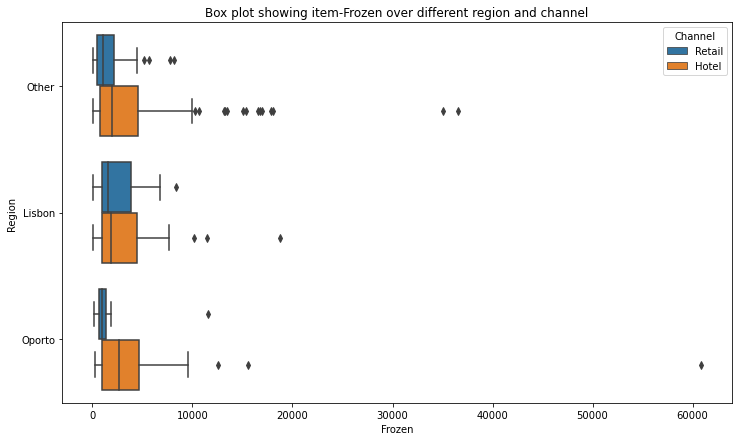

In [17]:
plt.figure(figsize=(12,7))
sns.boxplot(df['Frozen'],df['Region'],hue=df['Channel'])
plt.title("Box plot showing item-Frozen over different region and channel")

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot showing the annual spending item-Detergents_Paper over different region and channel')

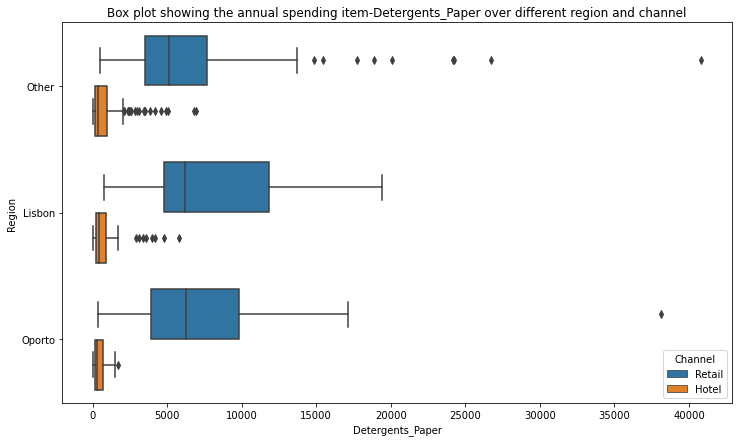

In [15]:
plt.figure(figsize=(12,7))
sns.boxplot(df['Detergents_Paper'],df['Region'],hue=df['Channel'])
plt.title("Box plot showing the annual spending item-Detergents_Paper over different region and channel")

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot showing the annual spending on item-Delicatessen over different region and channel')

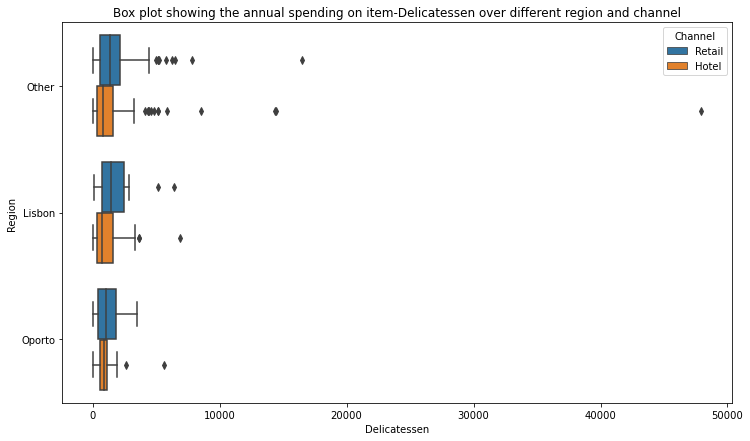

In [16]:
plt.figure(figsize=(12,7))
sns.boxplot(df['Delicatessen'],df['Region'],hue=df['Channel'])
plt.title("Box plot showing the annual spending on item-Delicatessen over different region and channel")

1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [18]:
#Calculating the CV for each item and then deciding which item showas the most consistent and inconsistent behaviour

ab=df.describe().T
ab.loc[ :,('Median')] = ab.median()
ab.loc[ :,('Total')] = ab.sum()
ab.loc[:,('CV')] = ab.loc[ :,('std')]/ab.loc[ :,('mean')]
ab

,count,mean,std,min,25%,50%,75%,max,Median,Total,CV
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0,NaN,NaN,0.576695
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,NaN,NaN,1.053918
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,NaN,NaN,1.273299
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,NaN,NaN,1.195174
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,NaN,NaN,1.580332
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,NaN,NaN,1.654647
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,NaN,NaN,1.849407


Smaller the CV, most consistency it shows
item showing the most inconsistent behaviour-Delicatessen 
item showing the least inconsistent behaviour- Fresh

1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.


Text(0.5, 1.0, 'Box plot showing the outliers of six items')

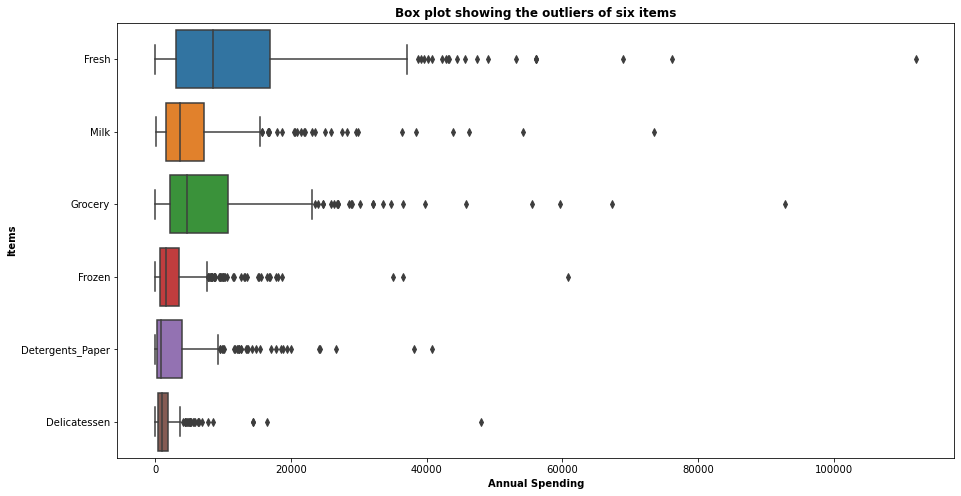

In [25]:
plt.figure(figsize=(15,8))
sns.boxplot(data=products,orient="h")
plt.ylabel('Items',fontweight='bold')
plt.xlabel('Annual Spending',fontweight='bold')
plt.title('Box plot showing the outliers of six items',fontweight='bold')

1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

# CMSU UNIVERSITY SURVEY DATA

2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

2.1.1. Gender and Major

2.1.2. Gender and Grad Intention

2.1.3. Gender and Employment

2.1.4. Gender and Computer

2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.2.1. What is the probability that a randomly selected CMSU student will be male?

2.2.2. What is the probability that a randomly selected CMSU student will be female?

2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.3.1. Find the conditional probability of different majors among the male students in CMSU.

2.3.2 Find the conditional probability of different majors among the female students of CMSU.

2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

2.6. Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

Answer the following questions based on the data

2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
import scipy.stats as stats

In [64]:
df=pd.read_csv("Survey-1.csv")

In [65]:
#CHECKING THE FIRST 5 ROWS OF THE DATASET

df.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [24]:
#CHECKING THE INFORMATION OF THE DATASET

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [25]:
#CHECKING THE DATATYPES OF THE VARIABLES IN THE DATASET

df.dtypes

ID                     int64
Gender                object
Age                    int64
Class                 object
Major                 object
Grad Intention        object
GPA                  float64
Employment            object
Salary               float64
Social Networking      int64
Satisfaction           int64
Spending               int64
Computer              object
Text Messages          int64
dtype: object

In [26]:
#CHECKING THE DESCRIPTION OF THE DATASET

df.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


In [27]:
df.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

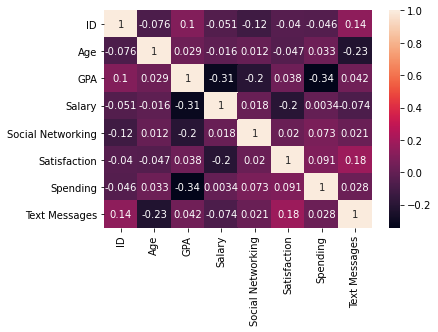

In [28]:
#CORREALTION PLOT

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

<Figure size 1944x2304 with 0 Axes>

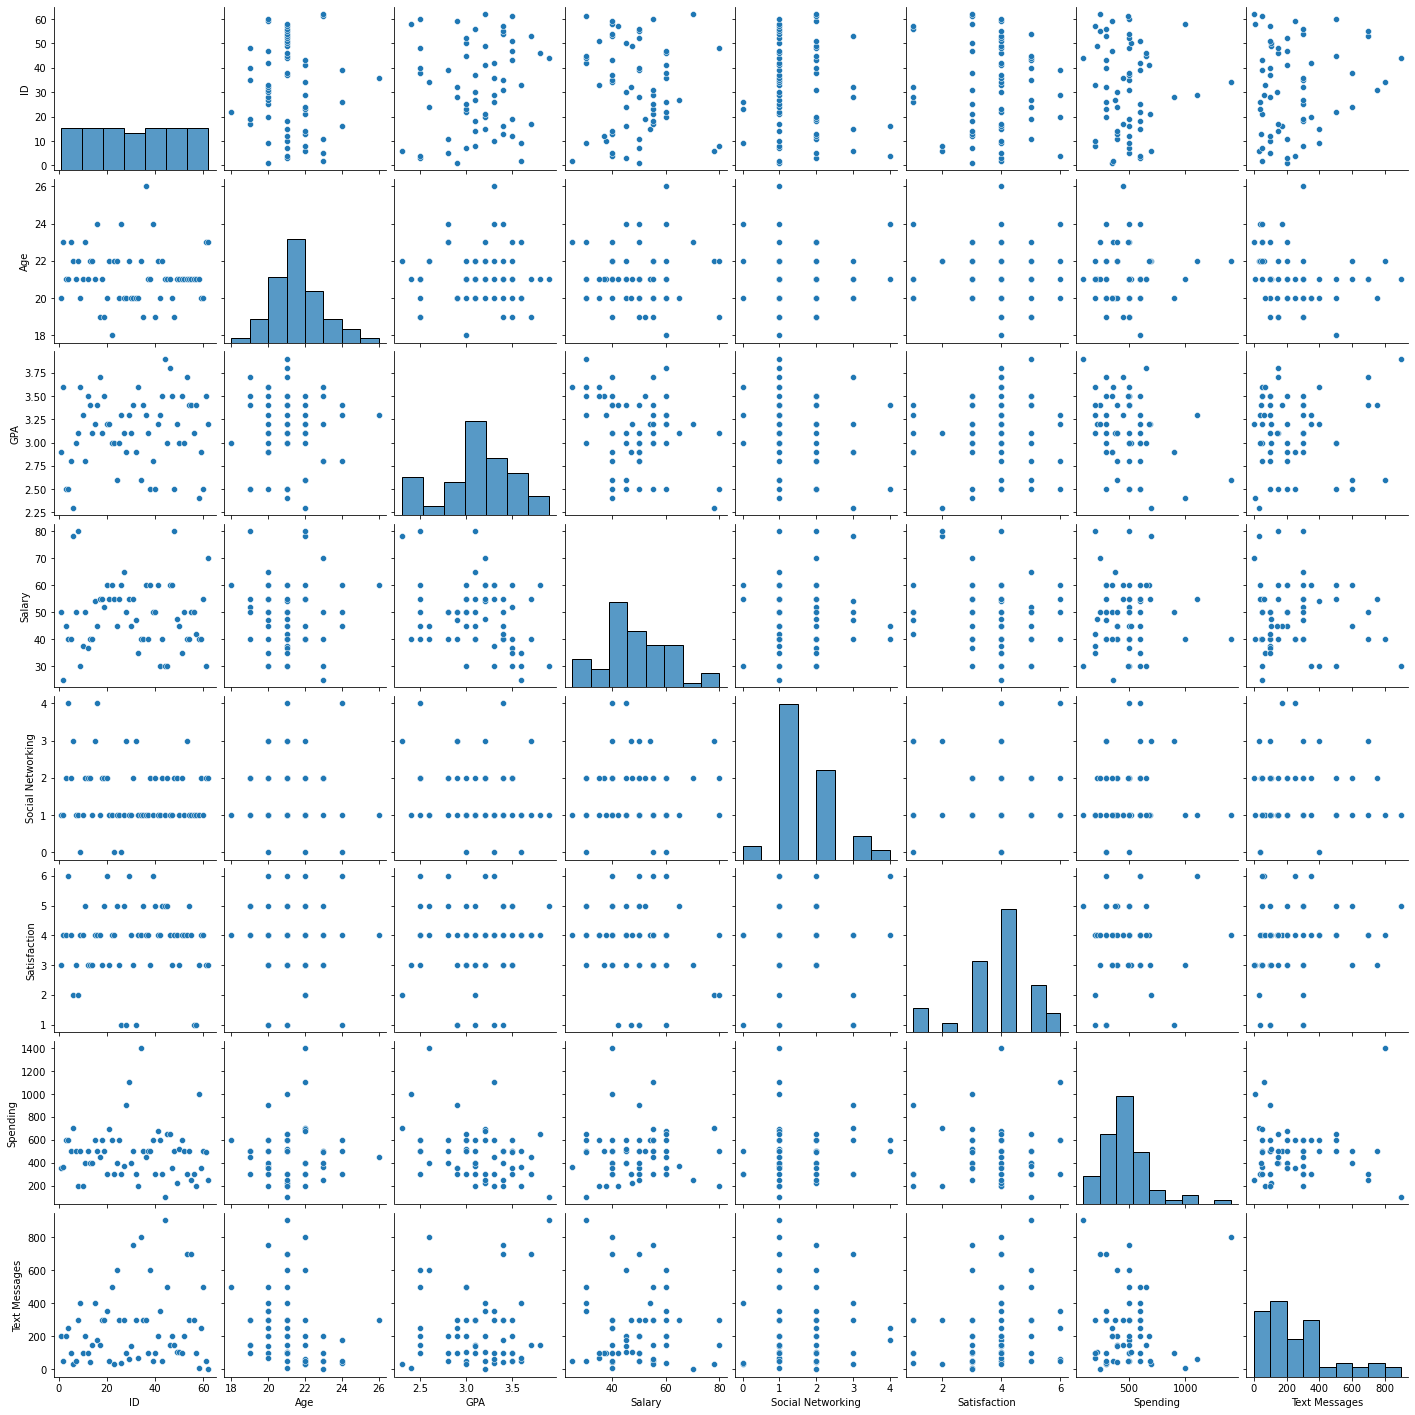

In [70]:
plt.figure(figsize = (27,32))
sns.pairplot(df)
plt.show()

2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

2.1.1. Gender and Major

In [29]:
pd.crosstab(df['Gender'],df['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


2.1.2. Gender and Grad Intention

In [30]:
pd.crosstab(df['Gender'],df['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


2.1.3. Gender and Employment

In [31]:
pd.crosstab(df['Gender'],df['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


2.1.4. Gender and Computer

In [32]:
pd.crosstab(df['Gender'],df['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [33]:
df['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [34]:
len(df['Gender'])

62

In [35]:
print('Probability that a randomly selected candidate will be male:',29/len(df['Gender']))

Probability that a randomly selected candidate will be male: 0.46774193548387094


2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [36]:
print('Probability that a randomly selected candidate will be female:',33/len(df['Gender']))

Probability that a randomly selected candidate will be female: 0.532258064516129


2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [37]:
pd.crosstab(df['Gender'],df['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [38]:
print('Among MALE candidates:')
print('Probability of Accounting:',4/29)
print('Probability of CIS:',1/29)
print('Probability of Economics/Finance:',4/29)
print('Probability of International Business:',2/29)
print('Probability of Management:',6/29)
print('Probability of Retailing/Markttiing:',5/29)
print('Probability of Other:',4/29)
print('Probability of Undecided:',3/29)
print()


Among MALE candidates:
Probability of Accounting: 0.13793103448275862
Probability of CIS: 0.034482758620689655
Probability of Economics/Finance: 0.13793103448275862
Probability of International Business: 0.06896551724137931
Probability of Management: 0.20689655172413793
Probability of Retailing/Markttiing: 0.1724137931034483
Probability of Other: 0.13793103448275862
Probability of Undecided: 0.10344827586206896



2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [39]:

print('Among FEMALE candidates:')
print('Probability of Accounting:',3/33)
print('Probability of CIS:',3/33)
print('Probability of Economics/Finance:',7/33)
print('Probability of International Business:',4/33)
print('Probability of Management:',4/33)
print('Probability of Retailing/Markttiing:',9/33)
print('Probability of Other:',3/33)
print()

Among FEMALE candidates:
Probability of Accounting: 0.09090909090909091
Probability of CIS: 0.09090909090909091
Probability of Economics/Finance: 0.21212121212121213
Probability of International Business: 0.12121212121212122
Probability of Management: 0.12121212121212122
Probability of Retailing/Markttiing: 0.2727272727272727
Probability of Other: 0.09090909090909091



2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [40]:
print("P(Male ∩ Grad intention) = P (Grad intention| Male) x P (male) = ",(17/29) * (29/62))

P(Male ∩ Grad intention) = P (Grad intention| Male) x P (male) =  0.27419354838709675


2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [41]:
print("P(Female ∩ no laptop) = P (No laptop| Female) x P (male) = ",(4/33) * (33/62))

P(Female ∩ no laptop) = P (No laptop| Female) x P (male) =  0.06451612903225806


2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

In [42]:
a=(29/62)+(10/62)-(7/62)
print("P(Male u full time employment) = P (male) + P (Full time employment) - P(male and having full time employment) =",round(a,3))

P(Male u full time employment) = P (male) + P (Full time employment) - P(male and having full time employment) = 0.516


2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [43]:
a=(4/33) +(4/33)
print("P(International Business u Management) = P (Female students majoring in international business) + P (Female students majoring in Management)=",round(a,3))

P(International Business u Management) = P (Female students majoring in international business) + P (Female students majoring in Management)= 0.242


2.6. Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [44]:
df_pd=pd.crosstab(df['Gender'],df['Grad Intention'])
df_pd


Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [45]:
df_pd.drop(columns="Undecided",inplace=True)
df_pd

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

Answer the following questions based on the data

2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [12]:
new_df=df[(df['GPA']<3)]
new_df.count()

ID                   17
Gender               17
Age                  17
Class                17
Major                17
Grad Intention       17
GPA                  17
Employment           17
Salary               17
Social Networking    17
Satisfaction         17
Spending             17
Computer             17
Text Messages        17
dtype: int64

In [51]:
print("The probability that the randomly chosen student's GPA is less than 3=",round(17/62,3) )

The probability that the randomly chosen student's GPA is less than 3= 0.274


2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [45]:
pd.crosstab(df['Gender'],df['Salary'])

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0
Gender,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1


In [52]:
df_a=df[(df['Salary']>=50)&(df['Gender']=="Male")]
df_a.count()

ID                   14
Gender               14
Age                  14
Class                14
Major                14
Grad Intention       14
GPA                  14
Employment           14
Salary               14
Social Networking    14
Satisfaction         14
Spending             14
Computer             14
Text Messages        14
dtype: int64

In [46]:
print("P(Male ∩ Salary>50) = P (salary >50| Male) x P (male) = ",(14/29) * (29/62))

P(Male ∩ Salary>50) = P (salary >50| Male) x P (male) =  0.22580645161290322


In [53]:
df_a=df[(df['Salary']>=50)&(df['Gender']=="Female")]
df_a.count()

ID                   18
Gender               18
Age                  18
Class                18
Major                18
Grad Intention       18
GPA                  18
Employment           18
Salary               18
Social Networking    18
Satisfaction         18
Spending             18
Computer             18
Text Messages        18
dtype: int64

In [54]:
print("P(Female ∩ Salary>50) = P (salary >50| Female) x P (female) = ",(18/33) * (33/62))

P(Female ∩ Salary>50) = P (salary >50| Female) x P (female) =  0.29032258064516125


2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

In [52]:
print("MEAN OF GPA OF THE GIVEN DATSET =",df['GPA'].mean())
print("MODE OF GPA OF THE GIVEN DATSET =",df['GPA'].mode())
print("MEDIAN OF GPA OF THE GIVEN DATSET =",df['GPA'].median())

MEAN OF GPA OF THE GIVEN DATSET = 3.129032258064516
MODE OF GPA OF THE GIVEN DATSET = 0    3.0
1    3.1
2    3.4
dtype: float64
MEDIAN OF GPA OF THE GIVEN DATSET = 3.1500000000000004


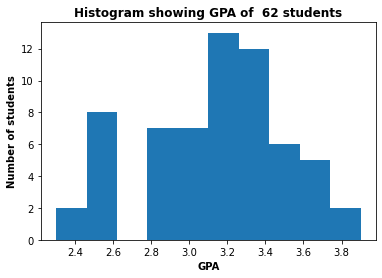

In [31]:
plt.hist(df['GPA'])
plt.xlabel('GPA',fontweight='bold')
plt.ylabel('Number of students',fontweight='bold')
plt.title('Histogram showing GPA of  62 students',fontweight='bold' )
plt.show()

In [54]:
print("MEAN OF SALARY OF THE GIVEN DATSET =",df['Salary'].mean())
print("MODE OF SALARY OF THE GIVEN DATSET =",df['Salary'].mode())
print("MEDIAN OF SALARY OF THE GIVEN DATSET =",df['Salary'].median())

MEAN OF SALARY OF THE GIVEN DATSET = 48.54838709677419
MODE OF SALARY OF THE GIVEN DATSET = 0    40.0
dtype: float64
MEDIAN OF SALARY OF THE GIVEN DATSET = 50.0


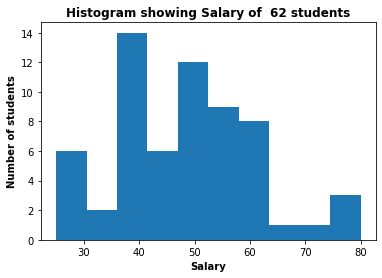

In [32]:
plt.hist(df['Salary'])
plt.xlabel('Salary',fontweight='bold')
plt.ylabel('Number of students',fontweight='bold')
plt.title('Histogram showing Salary of  62 students',fontweight='bold' )
plt.show()

In [56]:
print("MEAN OF SPENDING OF THE GIVEN DATSET =",df['Spending'].mean())
print("MODE OF SPENDING OF THE GIVEN DATSET =",df['Spending'].mode())
print("MEDIAN OF SPENDING OF THE GIVEN DATSET =",df['Spending'].median())

MEAN OF SPENDING OF THE GIVEN DATSET = 482.01612903225805
MODE OF SPENDING OF THE GIVEN DATSET = 0    500
dtype: int64
MEDIAN OF SPENDING OF THE GIVEN DATSET = 500.0


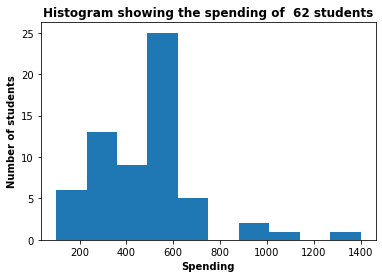

In [33]:
plt.hist(df['Spending'])
plt.xlabel('Spending',fontweight='bold')
plt.ylabel('Number of students',fontweight='bold')
plt.title('Histogram showing the spending of  62 students',fontweight='bold' )
plt.show()

In [58]:
print("MEAN OF TEXT MESSAGES OF THE GIVEN DATSET =",df['Text Messages'].mean())
print("MODE OF TEXT MESSAGES OF THE GIVEN DATSET =",df['Text Messages'].mode())
print("MEDIAN OF MESSAGES OF THE GIVEN DATSET =",df['Text Messages'].median())

MEAN OF TEXT MESSAGES OF THE GIVEN DATSET = 246.20967741935485
MODE OF TEXT MESSAGES OF THE GIVEN DATSET = 0    300
dtype: int64
MEDIAN OF MESSAGES OF THE GIVEN DATSET = 200.0


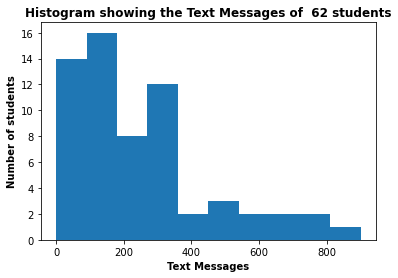

In [34]:
plt.hist(df['Text Messages'])
plt.xlabel('Text Messages',fontweight='bold')
plt.ylabel('Number of students',fontweight='bold')
plt.title('Histogram showing the Text Messages of  62 students',fontweight='bold' )
plt.show()

# MANUFACTURING SHINGES DATA

3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
import scipy.stats as stats
from scipy.stats import ttest_1samp,ttest_ind
import statsmodels.stats.api as sm

In [72]:
df=pd.read_csv("A+&+B+shingles.csv")

In [73]:
#CHECKING THE FIRST 5 ROWS OF THE DATASET

df.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [75]:
df['A'].mean()

0.3166666666666666

In [76]:
df['B'].mean()

0.2735483870967742

In [64]:
#CHECKING THE INFORMATION OF THE DATASET

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [65]:
#CHECKING THE DATATYPES OF THE VARIABLES IN THE DATASET

df.dtypes

A    float64
B    float64
dtype: object

In [66]:
#CHECKING THE DESCRIPTION OF THE DATASET

df.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


In [67]:
df.isnull().sum()

A    0
B    5
dtype: int64

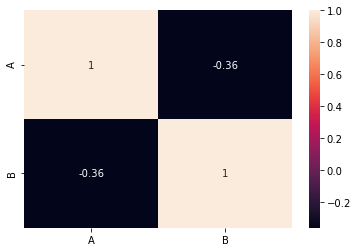

In [68]:
#CORREALTION PLOT

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [5]:
t_statistic, p_value = ttest_1samp(df.A, 0.35)

print('One sample t test of sample A \nt statistic: {0} p value: {1}'.format(t_statistic, p_value/2))

One sample t test of sample A 
t statistic: -1.4735046253382782 p value: 0.07477633144907513


Since pvalue > 0.05, do not reject H0 . There is not enough evidence to conclude that the mean moisture content for Sample A shingles is less than 0.35 pounds per 100 square feet. 


In [6]:
t_statistic, p_value = ttest_1samp(df.B, 0.35,nan_policy='omit' )

print('One sample t test of sample B\nt statistic: {0} p value: {1} '.format(t_statistic, p_value/2))

One sample t test of sample B
t statistic: -3.1003313069986995 p value: 0.0020904774003191826 


Since pvalue < 0.05, reject H0 . There is enough evidence to conclude that the mean moisture content for Sample B shingles is not less than 0.35 pounds per 100 square feet. 


3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [77]:
#H0 : μ(A)= μ(B)  

#Ha : μ(A)!= μ(B)  

#α = 0.05
t_statistic,p_value=ttest_ind(df['A'],df['B'] ,nan_policy='omit')  

print("t_statistic={} and pvalue={}".format(round(t_statistic,3),round(p_value,3)))  


t_statistic=1.29 and pvalue=0.202


As the pvalue > α , do not reject H0; and we can say that population mean for shingles A and B are equal .